In [1]:
import hypernetx as hnx
from hypernetx.utils import DefaultOrderedDict
import networkx as nx
import pandas as pd
import numpy as np
from collections import Counter,OrderedDict,defaultdict
import pickle
import matplotlib.pyplot as plt
import nwhy
import warnings 
warnings.simplefilter('ignore')
import itertools as it

In [2]:
pwd

'/Users/liux238/Downloads/pnnl-hyper'

## CL hypergraph

**Option 1:  Generate from scratch using csv file.**

**Option 2: Recover hypergraph from saved state.**  
As collapsing is still a slow process, once a hypergraph has been collapsed it is best to save its state for repeated use.

In [3]:
Hc = hnx.Hypergraph.recover_from_state('CL_0f_larger_hypergraph_state_collapse_receivers.p', use_nwhy=True, newfpath='same')
Hc.nwhy, Hc.state_dict.keys()

(True, dict_keys(['data', 'snodelg', 'sedgelg', 'equiv_classes']))

## Line Graphs
NWHY Line graphs cannot be saved in state but are fast to compute. They are held during a session in the hypergraph attribute nwhy_dict. S-centrality statistics are graph statistics taken on the nodes of a line graph.

Line graphs may be generated for both the nodes and edges of a hypegraph.

In [4]:
## s-Edge Line Graphs for s up to 50 
lgs = {s: Hc.get_linegraph(s=s,edges=True, use_nwhy=True) for s in range(1,50)}

In [5]:
## Line graphs stored in nwhy_dict
Hc.shape,Hc.nwhy_dict

((45, 4619),
 {'snodelg': {},
  'sedgelg': {1: <nwhy.Slinegraph at 0x12b807bf0>,
   2: <nwhy.Slinegraph at 0x12b807fb0>,
   3: <nwhy.Slinegraph at 0x12b608030>,
   4: <nwhy.Slinegraph at 0x12b807ab0>,
   5: <nwhy.Slinegraph at 0x12b807a70>,
   6: <nwhy.Slinegraph at 0x12b608070>,
   7: <nwhy.Slinegraph at 0x12b608130>,
   8: <nwhy.Slinegraph at 0x12b608170>,
   9: <nwhy.Slinegraph at 0x12b6081f0>,
   10: <nwhy.Slinegraph at 0x12b608270>,
   11: <nwhy.Slinegraph at 0x12b6082b0>,
   12: <nwhy.Slinegraph at 0x12b6082f0>,
   13: <nwhy.Slinegraph at 0x12b6081b0>,
   14: <nwhy.Slinegraph at 0x12b608330>,
   15: <nwhy.Slinegraph at 0x12b608370>,
   16: <nwhy.Slinegraph at 0x12b6083b0>,
   17: <nwhy.Slinegraph at 0x12b6083f0>,
   18: <nwhy.Slinegraph at 0x12b608430>,
   19: <nwhy.Slinegraph at 0x12b608470>,
   20: <nwhy.Slinegraph at 0x12b608230>,
   21: <nwhy.Slinegraph at 0x12b6084f0>,
   22: <nwhy.Slinegraph at 0x12b608530>,
   23: <nwhy.Slinegraph at 0x12b608570>,
   24: <nwhy.Slinegraph a

## s-Connected Components
The list of edges/nodes in s-connected components is generated by NWHy.  
Restricting to those edges/nodes is still done using Python.  

In [6]:
## This will only return the non-singleton components
comps = {s: list(Hc.s_connected_components(s=s,return_singletons=False)) for s in range(1,50)}

**The s-centrality metrics are computed on the connected components of the hypegraph.**  
In this example there is one non-singleton connected component for each s in the range 1 through 20.

In [7]:
## get upper bound for s on nonzero number of non-singleton s-connected components
for limit in range(1,50):
    if len(comps[limit]) == 0:
        print(limit)
        break
        
## Print the number of components on each level and the size of the largest       
[(s,len(comps[s]),len(comps[s][0])) for s in range(1,limit)]

21


[(1, 1, 4619),
 (2, 1, 4573),
 (3, 1, 3634),
 (4, 1, 1691),
 (5, 1, 763),
 (6, 1, 401),
 (7, 1, 227),
 (8, 1, 145),
 (9, 1, 87),
 (10, 1, 58),
 (11, 1, 40),
 (12, 1, 26),
 (13, 1, 18),
 (14, 1, 13),
 (15, 1, 11),
 (16, 1, 8),
 (17, 1, 2),
 (18, 1, 2),
 (19, 1, 2),
 (20, 1, 2)]

### Compute the s-centrality metrics for a single s=S

In [8]:
S = 15
subg = list(Hc.s_component_subgraphs(s=S, return_singletons=False))[0]
subg.shape

(42, 11)

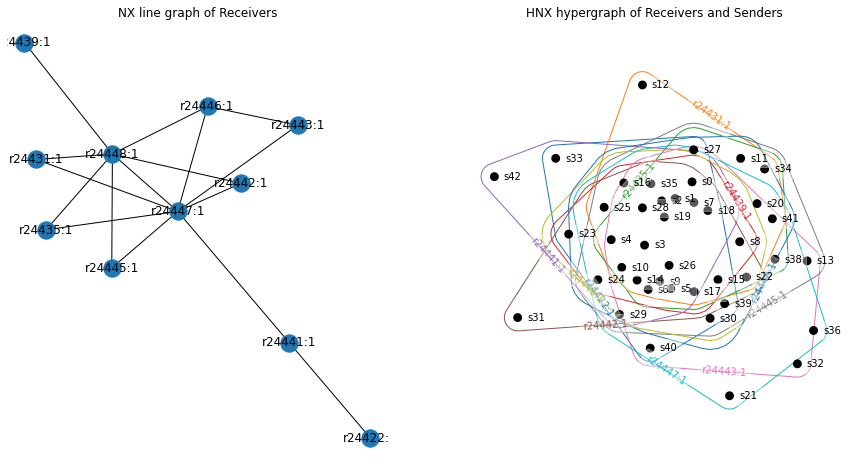

In [9]:
#Examine both the hypergraph and line graph generated on the receivers for this sub-hypergraph

fig,ax = plt.subplots(1,2,figsize=(15,8))

x = lgs[S].row
y = lgs[S].col
edges = np.zeros((2,len(x)),dtype=int)
edges[0,:] = x
edges[1,:] = y
G = nx.Graph()
G.add_edges_from(edges.T)
ax[0].set_title('NX line graph of Receivers')
nx.draw(G, with_labels=True, labels={nd:Hc.get_name(nd,edges=True) for nd in G.nodes()},ax=ax[0])

ax[1].set_title('HNX hypergraph of Receivers and Senders')
hnx.draw(subg,ax=ax[1])

In [12]:
from hnxwidget import HypernetxWidget
HypernetxWidget(subg.remove_static(),collapse=True)

HypernetxWidget(component='HypernetxWidget', props={'nodes': [{'elements': [{'uid': 's5:1', 'value': 1}]}, {'e…

## S-Centrality Scores computed on Receivers within this sub-hypergraph

In [ ]:
g = subg.get_linegraph(s=S)
scdf = pd.DataFrame(list(subg.edges), columns=['Receivers'])
scdf['betweenness'] = g.s_betweenness_centrality()
scdf['closeness'] = g.s_closeness_centrality()
scdf['harmonic_closeness'] = g.s_harmonic_closeness_centrality()
scdf['eccentricity'] = g.s_eccentricity()
scdf

In [ ]:
scdf = scdf.sort_values(['betweenness','closeness'],ascending=False)
scdf

## Examine the hypergraph for the K most S-central nodes

In [ ]:
K = [2,3,4]
roi = {k: scdf.iloc[:k].Receivers.values for k in K}
subgR = {k: subg.restrict_to_edges(roi[k]) for k in K}


In [ ]:
fig,ax = plt.subplots(1,len(K),figsize=(20,10))
for kdx,k in enumerate(K):
    ax[kdx].set_title(f'k={k}',fontsize=20)
    hnx.draw(subgR[k], ax=ax[kdx])

In [ ]:
## Identify senders common to all edges in the graphs
intersections = dict()
for kdx,obj in roi.items():
    temp = set(subg.edges[obj[0]])
    for r in obj[1:]:
        temp = temp.intersection(subg.edges[r])
    intersections[kdx] = temp
print(intersections[4])

### View 3 graphs collapsed

In [ ]:
subgRC ={k: subgR[k].collapse_nodes(return_equivalence_classes=True) for k in K}

In [ ]:
fig,ax = plt.subplots(1,len(K),figsize=(20,10))
pos = dict()
for kdx,k in enumerate(K):
    pos[kdx] = hnx.draw(subgRC[k][0], ax=ax[kdx], return_pos=True)

In [ ]:
## equivalence classes
subgRC[3][1]

In [ ]:
from hnxwidget import HypernetxWidget
HypernetxWidget(subgRC[3][0].remove_static())

In [ ]:
HypernetxWidget(subgRC[4][0].remove_static())

In [ ]:
# import pickle
# pickle.dump(subgRC[4][0].remove_static(),open('CLexample.p','wb'))

In [ ]:
HypernetxWidget??

In [ ]:
subgd = subg.remove_static()